# Final Exam
ANALYST: Fan Li

DUE DATE: Dec 10, 2020

In [60]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [18]:
# read in data (path varys)
df=pd.read_csv("../data/IBM.csv", index_col='Date',parse_dates=[0],na_values=['none'])

In [19]:
# check df
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.970992,387200
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.988223,288000
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.968407,256000
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.929643,363200
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.893463,544000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14554 entries, 1962-01-02 to 2019-10-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       14554 non-null  float64
 1   High       14554 non-null  float64
 2   Low        14554 non-null  float64
 3   Close      14554 non-null  float64
 4   Adj Close  14554 non-null  float64
 5   Volume     14554 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 795.9 KB


#### Section 1
Q: Replace any missing values with one of the 
following: column mean, column mode, or a 
specific value.

In [27]:
fill_value={'Open':df['Open'].mean()}
df.fillna(fill_value,inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.970992,387200
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.988223,288000
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.968407,256000
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.929643,363200
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.893463,544000
...,...,...,...,...,...,...
2019-10-18,134.220001,134.490005,132.250000,134.089996,134.089996,7177500
2019-10-21,132.610001,133.100006,130.899994,132.580002,132.580002,6306100
2019-10-22,132.550003,134.050003,131.610001,133.960007,133.960007,4161600


Q: Change data frame column data types

In [32]:
df['Volume']=df['Volume'].astype(float)
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

Q: Use seaborn to create a scatterplot with regression 
line that includes a plot title, x-axis label, and yaxis label like the example at the right.

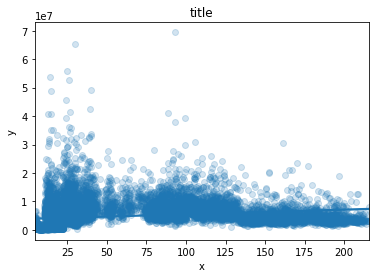

In [48]:
sns.regplot(data=df,x='High',y='Volume',scatter_kws={'alpha':.2})
plt.title('title')
plt.xlabel('x')
plt.ylabel('y');

Q: Boolean subsetting: use a conditional statement on 
a column to select specific rows of the data and 
save them in a new data frame. Example: get the 
rows from the “tips” data where group size is 3 or 
more.

In [57]:
df2=df[df['High']>=200]
df2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-05,198.360001,201.190002,198.300003,200.660004,154.692764,6938000.0
2012-03-09,199.979996,201.100006,199.720001,200.619995,154.661926,3178200.0
2012-03-12,200.929993,201.570007,200.229996,201.000000,154.954849,3119700.0
2012-03-13,201.720001,203.899994,201.610001,203.779999,157.098022,4866000.0
2012-03-14,203.779999,205.149994,203.639999,204.720001,157.822678,4602300.0
...,...,...,...,...,...,...
2013-06-17,203.440002,205.169998,202.550003,203.039993,159.958832,3219900.0
2013-06-18,203.020004,206.089996,202.869995,204.869995,161.400558,3277800.0
2013-06-19,204.440002,205.029999,201.929993,201.940002,159.092300,2846100.0


Q: Use GroupBy to create a simple aggregation of a column using count, sum, or mean.
Example: find the average total bill for each day.

In [59]:
df2.groupby('Date')['Open'].sum()

Date
2012-03-05    198.360001
2012-03-09    199.979996
2012-03-12    200.929993
2012-03-13    201.720001
2012-03-14    203.779999
                 ...    
2013-06-17    203.440002
2013-06-18    203.020004
2013-06-19    204.440002
2013-06-20    200.669998
2013-07-18    198.270004
Name: Open, Length: 179, dtype: float64

Q: Run a basic multiple regression using statsmodels. Understand if the model needs to be 
adjusted and run again.

In [63]:
model=sm.OLS(df2['Close'],df2[['Open','Volume']])
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.660e+06
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                        0.00
Time:                        15:17:18   Log-Likelihood:                         -326.60
No. Observations:                 179   AIC:                                      657.2
Df Residuals:                     177   BIC:                                      663.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Open           1.0022      0.001    732.066      0.000       0.999       1.005
Volume     -7.574e-08   6.55e-08     -1.156      0.249   -2.05e-07    5.35e-08
==============================================================================
Omnibus:                        1.670   Durbin-Watson:                   2.327
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.278
Skew:                          -0.167   Prob(JB):                        0.528
Kurtosis:                       3.244   Cond. No.                     5.21e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P-value of Volume is 0.249, which is greater than 0.05 and indicates Volume is not a statistically significant variable. Therefor it should be omit.

In [4]:
df2=df[df['zipcode']==10007]
df2

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
36,36,NY,10007,1,440,370,30,20,320,410,...,240,290,0,0,0,0,110,108,220,320
37,36,NY,10007,2,280,210,30,30,190,360,...,250,911,0,0,0,0,70,180,180,494
38,36,NY,10007,3,230,190,30,20,140,300,...,230,1829,0,0,0,0,60,262,160,450
39,36,NY,10007,4,220,170,30,0,150,310,...,220,2722,0,0,0,0,50,327,160,936
40,36,NY,10007,5,570,390,130,30,400,850,...,560,14308,40,14,0,0,130,1124,380,2065
41,36,NY,10007,6,1590,550,960,40,1300,3680,...,1590,527171,1370,7621,1270,11162,810,31869,490,24569


Q: Create df3 so it contains only zip code 10451.

In [5]:
df3=df[df['zipcode']==10451]

Q: Display the first five lines for each. Use print() if 
you want to do it in one cell.

In [6]:
print(df2.head(),'/n',
     df3.head())

    STATEFIPS STATE  zipcode  agi_stub   N1  mars1  MARS2  MARS4  PREP   N2  \
36         36    NY    10007         1  440    370     30     20   320  410   
37         36    NY    10007         2  280    210     30     30   190  360   
38         36    NY    10007         3  230    190     30     20   140  300   
39         36    NY    10007         4  220    170     30      0   150  310   
40         36    NY    10007         5  570    390    130     30   400  850   

    ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  A11901  \
36  ...     240     290       0       0       0       0     110     108   
37  ...     250     911       0       0       0       0      70     180   
38  ...     230    1829       0       0       0       0      60     262   
39  ...     220    2722       0       0       0       0      50     327   
40  ...     560   14308      40      14       0       0     130    1124   

    N11902  A11902  
36     220     320  
37     180     494  
38     160 

Q: Generate a bar plot for each of these data frames (in 
separate cells) showing the AGI category (agi_stub) 
on the x-axis and the number of returns (N1) on the 
y-axis. Use the seaborn method catplot(). It works 
the same way the other seaborn plotting methods 
work; you just have to add the parameter 
kind=’bar’ to get the bar chart.

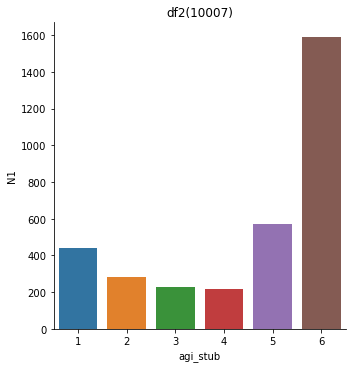

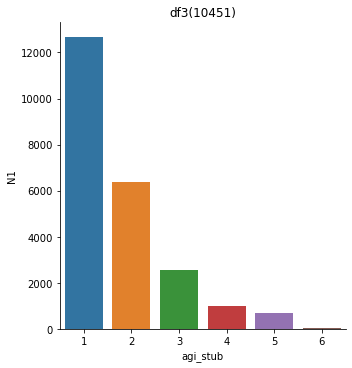

In [7]:
# df2 plot
sns.catplot(data=df2,x='agi_stub',y='N1',kind='bar')
plt.title('df2(10007)');
# df3 plot
sns.catplot(data=df3,x='agi_stub',y='N1',kind='bar')
plt.title('df3(10451)');

Q: When you have finished both plots, insert a new markdown cell 
below the second plot and answer this question in a complete
sentence:
>These two zip codes represent one of the poorest and one of the richest 
areas in New York City. How can you tell from your bar plots which is 
the poorest and which is the richest?

A: According to the documentation, `agi_stub` stands for *Size of adjusted gross income*, which is compartmentalized by income amount in ascending order through one to six. `N1` is *number of returns*. Plots aboves indicate area with zipcode 10007 has the most number of returns with respect of agi_stub-6(6 = 200,000 or more). In contrast, area with zipcode 10451 has the most number of returns with income below $25000. 

Thus, area with zipcode 10007 is the richest and one with zipcode 10451 is the poorest.

#### Section 2
Q: Create df4 so it contains only the second AGI category
(agi_stub).

In [8]:
df4=df[df['agi_stub']==2]

Q:Print the info method results for df4 to the screen.

In [9]:
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 1 to 9229
Columns: 131 entries, STATEFIPS to A11902
dtypes: int64(130), object(1)
memory usage: 1.5+ MB
None


Q:Generate a scatter plot using the seaborn 
scatterplot() method that displays the number of 
exemptions (N2) on the x-axis and the number of 
returns with paid preparer signatures (PREP) on 
the y-axis. That method is an axes-level plot, so 
you will need to use the figure and axes process 
we used in the second plotting notebook.

Set the overall title to Paid Preparers by Exemptions for AGI Group 2

Set the y-axis label to Returns with Paid Preparers

Set the x-axis label to Number of Exemptions

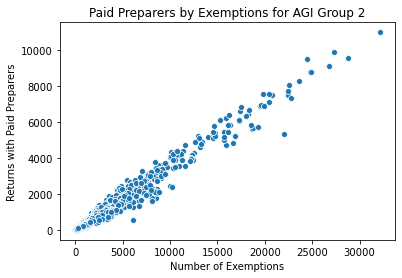

In [10]:
# plotting
ax=sns.scatterplot(data=df4,x='N2',y='PREP')
# add attributes
ax.set(title='Paid Preparers by Exemptions for AGI Group 2',
       ylabel='Returns with Paid Preparers',
       xlabel='Number of Exemptions');

#### Section 3
Q: Create df5 so it only contains the AGI category (agi_stub), number of joint returns 
(MARS2), and number of volunteer prepared returns with an Earned Income Credit 
(VITA_EIC) columns.

Print the info method for df5 to the screen

In [11]:
# create df5
df5=df[['agi_stub','MARS2','VITA_EIC']]
# df5 info
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9234 entries, 0 to 9233
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   agi_stub  9234 non-null   int64
 1   MARS2     9234 non-null   int64
 2   VITA_EIC  9234 non-null   int64
dtypes: int64(3)
memory usage: 216.5 KB
None


Q: Create df6 so it contains the rows from df5 that have AGI category values of three or less.

a. Print the describe method for df6 to the screen.

In [12]:
# create df6
df6=df5[df5['agi_stub']<=3]
# describe df6
df6.describe()

,agi_stub,MARS2,VITA_EIC
count,4617.000000,4617.000000,4617.000000
mean,2.000000,282.514620,11.323370
std,0.816585,552.888998,50.729117
min,1.000000,0.000000,0.000000
25%,1.000000,50.000000,0.000000
50%,2.000000,110.000000,0.000000
75%,3.000000,300.000000,0.000000
max,3.000000,12530.000000,810.000000


Q: Generate three scatter plots using the seaborn lmplot() method and the df6 data so 
each agi_stub value has its own plot.

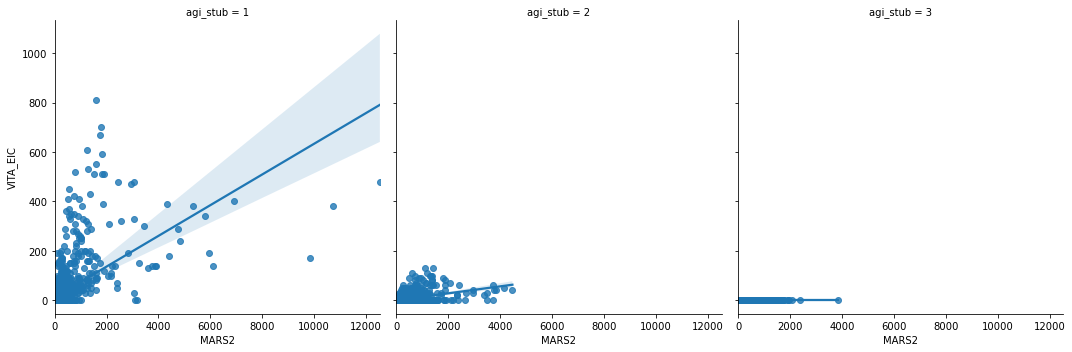

In [13]:
sns.lmplot(data=df6,x='MARS2',y='VITA_EIC',col='agi_stub');